In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D


    This will serve as a lump soliton solution visualization

In [81]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

N = 200
Lx = 500
Ly = 500
x = np.linspace(-Lx, Lx, N)
y = np.linspace(-Ly, Ly, N)
X,Y = np.meshgrid(x,y)

lam = 1
eta = .8

fig = plt.figure()
ax = plt.axes(xlim=(-Lx, Lx), ylim=(-Ly, Ly)  , projection='3d' ) # 

def phi(x, y, t, lam):
    return lam*x + lam**2*y*1j -4*lam**3*t

def lump_2_soliton_depth0(x, y, t, lam, eta):
    tau = np.cosh(np.real(phi(x,y,t,lam)-np.conj(phi(x,y,t,eta))) + np.log(lam/eta)/2)/np.sqrt(lam*eta)
    tau += 2*np.cos((lam**2-eta**2)*y)/(lam + eta)
    tau *= np.exp(phi(x,y,t,lam)+np.imag(phi(x,y,t,eta)))
    
    

def lump_soliton_depth1(x, y, t, lam):
    z = x - 12*lam**2*t - 1/(2*lam)
    C = 1/(4*lam**2)+4*lam**2*y**2
    u = -2*z**2+C
    u /=(z**2+C)**2
    return u

def lump_soliton_depth2(x, y, t, lam):
    B = 4*lam*y-24*lam**2*t 
    C = 4*lam**2*y**2+144*lam**4*t**2-48*lam**3*y*t-24*lam*t
    
    alpha = 2*B - 2/lam
    beta = 12/((2*lam)**2) - 3*B/lam+B**2+2*C
    gamma = -24/((2*lam)**3) + 12*B/((2*lam)**2) + 2*(B**2+2*C)/(2*lam) + 2*B*C
    delta = 24/((2*lam)**4) - 12*B/((2*lam)**3) + 2*(B**2+2*C)/((2*lam)**2) - B*C/lam + C**2 + 4*y**2
#     tau = x**4+alpha*x**3+beta*x**2+gamma*x+delta
    num = - 4*x**6 - 6*alpha*x**5 - (3*alpha**2 + 2*beta)*x**4 - 4*(alpha*beta - gamma)*x**3 - (2*beta**2 - 12*delta)*x**2 - (2*beta*gamma - 6*alpha*delta)*x + 2*beta*delta - gamma**2
    den = x**8 + 2*alpha*x**7 + (alpha**2+2*beta)*x**6 + 2*(alpha*beta+gamma)*x**5 + (2*delta+2*alpha*gamma+beta**2)*x**4 + 2*(alpha*delta+beta*gamma)*x**3 + (2*beta*delta+gamma**2)*x**2 + 2*delta*gamma*x + delta**2
    u = -num/den
    return u

# def init():
#     cont.set_data([], [], [])
#     return cont,
def animate(i):
    Z = lump_soliton_depth2(X,Y,2*i,lam)
    ax.clear()
    plt.title(r"t={}, $\lambda$={}".format(i, lam))
    # Plot the surface.
#     surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                            linewidth=0, antialiased=False)
#     ax.set_zlim(-5, 30)
#     cont = ax.plot_wireframe(X,Y,Z)
#     cont = ax.contour(X,Y,Z, 50) # levels=list(range(-10,10))
    cont = ax.contour(X,Y,Z, 100, cmap="RdGy") # levels=list(range(-10,10))
#     cont = ax.contourf(X,Y,Z, 50) # levels=[-10, 0, 10]
#     cont = plt.imshow(Z, cmap='hot', interpolation='nearest') # , cmap='hot', interpolation='nearest'
    return cont,



anim = FuncAnimation(fig, animate, frames=50) # , init_func=init, blit=True, , interval=1



anim.save('lump_depth2_contour_lam{}v3.gif'.format(lam), writer='Pillow')

MovieWriter Pillow unavailable; using Pillow instead.


<IPython.core.display.Javascript object>

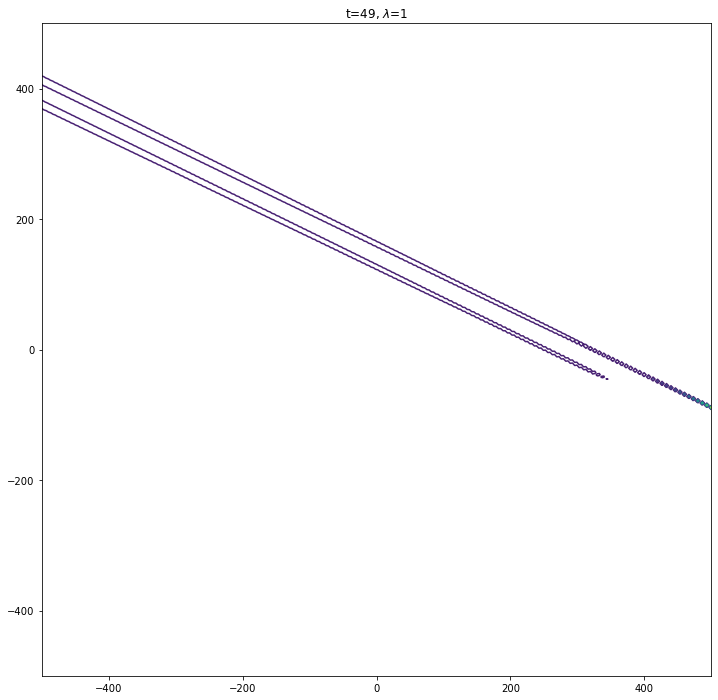